In [1]:
%load_ext autoreload
%autoreload 2

In [7]:
import sys
sys.path.append('../')
import pandas as pd
import rdkit
import rdkit.Chem as Chem
rdkit.RDLogger.DisableLog('rdApp.*')

import cv2
import matplotlib.pyplot as plt
import multiprocessing

def get_num_atoms(smiles):
    try:
        return Chem.MolFromSmiles(smiles).GetNumAtoms()
    except:
        return None

train_df = pd.read_csv('../data/molbank/pubchem/train_200k.csv')

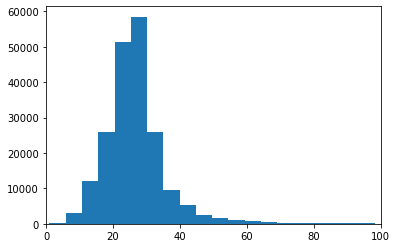

In [8]:
def compute_num_atoms(df):
    with multiprocessing.Pool(16) as p:
        num_atoms = p.map(get_num_atoms, df['SMILES'].tolist())
        df['num_atoms'] = num_atoms
    return num_atoms

num_atoms = compute_num_atoms(train_df)
plt.hist(num_atoms, bins=50)
plt.xlim((0, 100))
plt.show()

In [12]:
(np.array(num_atoms) >= 60).mean()

0.01345

In [49]:
import numpy as np
from bms.chemistry import convert_smiles_to_canonsmiles

def accuracy_by_num_atom(pred, data):
    x = []
    accuracy = []
    for num in range(0, 100, 10):
        indices = (num < data['num_atoms']) & (data['num_atoms'] <= num+5)
        if num == 100:
            indices = (num < data['num_atoms'])
        print(num, 'count:', sum(indices))
        subset_data = data[indices]
        subset_pred = pred[indices]
        data_smiles, _ = convert_smiles_to_canonsmiles(subset_data['SMILES'], ignore_cistrans=True)
        pred_smiles, _ = convert_smiles_to_canonsmiles(subset_pred['post_SMILES'], ignore_cistrans=True)
        acc = np.mean(np.array(data_smiles) == np.array(pred_smiles))
        x.append(num)
        accuracy.append(acc)
    return x, accuracy

test_df = pd.read_csv('../data/molbank/pubchem/test.csv')
compute_num_atoms(test_df)
pred_df = pd.read_csv('../output/pubchem/synthetic/swin_base_200k_joint_large100k/prediction_test.csv')

In [50]:
x, accuracy = accuracy_by_num_atom(pred_df, test_df)

0 count: 59
10 count: 3043
20 count: 12724
30 count: 6590
40 count: 1151
50 count: 369
60 count: 179
70 count: 91
80 count: 48
90 count: 24


In [51]:
print(x)
print(accuracy)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
[0.6101694915254238, 0.9802826158396319, 0.988839987425338, 0.9811836115326252, 0.9600347523892268, 0.9051490514905149, 0.8268156424581006, 0.8131868131868132, 0.5416666666666666, 0.5]


(array([   34.,   427.,  2523.,  5591., 11328., 15432.,  7841.,  3413.,
        1385.,   650.,   405.,   272.,   189.,   124.,    97.,    76.,
          58.,    41.,    24.,    28.]), array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]), <BarContainer object of 20 artists>)


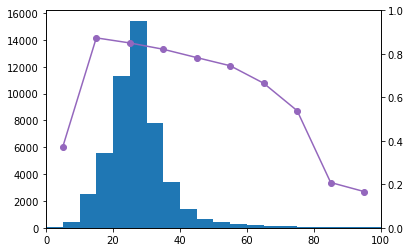

In [33]:
fig, ax1 = plt.subplots()
print(plt.hist(test_df['num_atoms'], bins=20, range=(0,100)))
ax2 = plt.twinx()
plt.plot(np.array(x)+5, accuracy, '-o', color='tab:purple', zorder=1)
ax2.set_ylim(0, 1)
plt.xlim((0, 100))
plt.show()

0.8538031624863686
0.34782608695652173
0
InChI=1S/C8H9Br3/c9-7-4-8(10,11)6-2-1-5(7)3-6/h4-6H,1-3H2
InChI=1S/C9H9Br5/c10-7-4-8(11,9(12,13)14)6-2-1-5(7)3-6/h4-6H,1-3H2


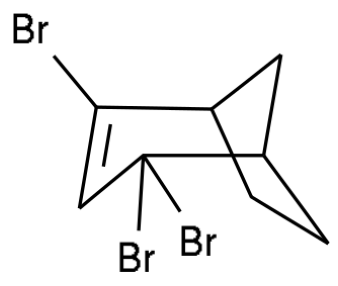

BrC1=CC(Br)(Br)C2CCC1C2
BrC1=CC(Br)(C(Br)(Br)Br)C2CCC1C2


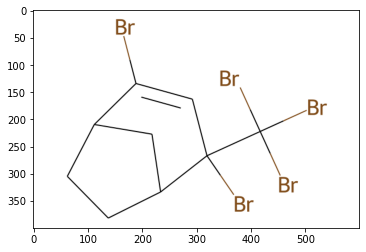

13
InChI=1S/Re.7S
InChI=1S/H2O/h1H2


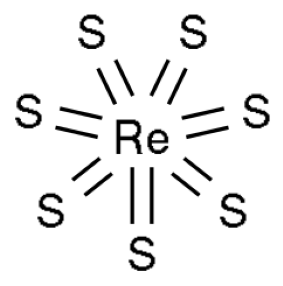

S=[Re](=S)(=S)(=S)(=S)(=S)=S
S=S(=S)(=S)(=S)(S)=S
28
InChI=1S/C21H21FN6O2/c1-30-21-18(27-9-8-26-14-4-2-3-7-25-14)16(22)17(24)15-19(21)28(13-5-6-13)11-12(10-23)20(15)29/h2-4,7,11,13,27H,5-6,8-9,24H2,1H3,(H,25,26)
InChI=1S/C21H21FN6O2/c1-30-21-18(27-9-8-26-14-4-2-3-7-25-14)17(24)16(22)15-19(21)28(13-5-6-13)11-12(10-23)20(15)29/h2-4,7,11,13,27H,5-6,8-9,24H2,1H3,(H,25,26)


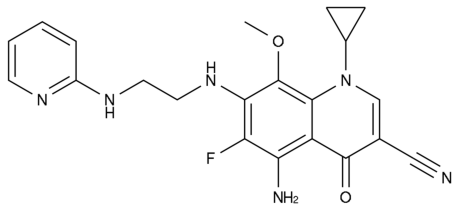

COc1c(NCCNc2ccccn2)c(F)c(N)c2c(=O)c(C#N)cn(C3CC3)c12
COc1c(NCCNc2ccccn2)c(N)c(F)c2c(=O)c(C#N)cn(C3CC3)c12


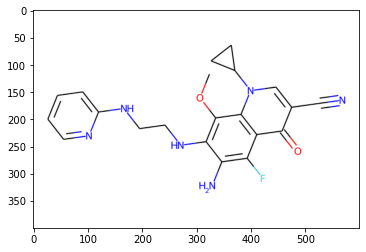

97
InChI=1S/C10H11ClN2O4/c1-12-9(14)13(17-10(15)16-2)8-5-3-7(11)4-6-8/h3-6H,1-2H3,(H,12,14)
InChI=1S/C10H10ClNO5/c1-15-9(13)12(17-10(14)16-2)8-5-3-7(11)4-6-8/h3-6H,1-2H3


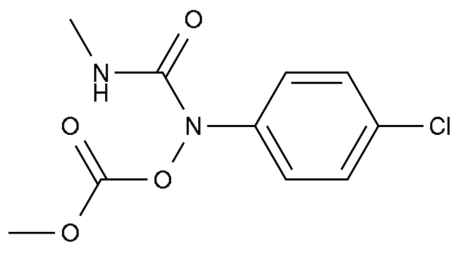

CNC(=O)N(OC(=O)OC)c1ccc(Cl)cc1
COC(=O)ON(C(=O)OC)c1ccc(Cl)cc1


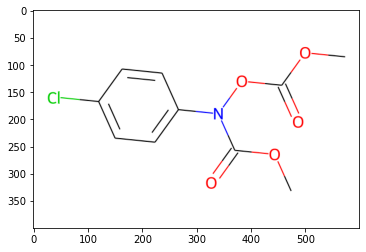

159
InChI=1S/C24H50O/c1-3-5-7-9-11-13-15-17-19-21-23-25-24-22-20-18-16-14-12-10-8-6-4-2/h3-24H2,1-2H3
InChI=1S/C25H52O/c1-3-5-7-9-11-13-15-17-19-21-23-25-26-24-22-20-18-16-14-12-10-8-6-4-2/h3-25H2,1-2H3


CCCCCCCCCCCCOCCCCCCCCCCCC
CCCCCCCCCCCCCOCCCCCCCCCCCC


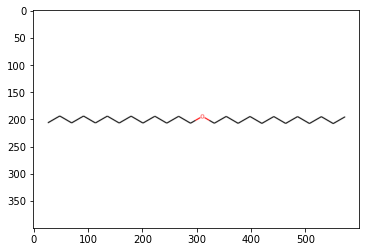

167
InChI=1S/C27H33N3O3S/c1-16(2)29-11-9-28-15-20-24(23-7-6-12-34-23)25-19-14-22(33-17(3)4)21(32-5)13-18(19)8-10-30(25)26(20)27(29)31/h6-7,12-14,16-17,28H,8-11,15H2,1-5H3
InChI=1S/H2O/h1H2


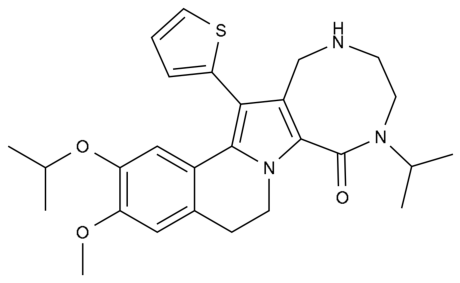

COc1cc2c(cc1OC(C)C)-c1c(-c3cccs3)c3c(n1CC2)C(=O)N(C(C)C)CCNC3
COC1C=C2CCN3C(C(=O)N(CCNC3=O)C(C)C)=C3C2=CC(OC(C)C)=C(C=1)OC(C)C
208
InChI=1S/C19H25NO4/c1-13-4-8-16(9-5-13)20-19(22)11-7-15-6-10-17(24-14(2)21)18(12-15)23-3/h6-7,10-13,16H,4-5,8-9H2,1-3H3,(H,20,22)
InChI=1S/C19H25NO4/c1-13-4-8-16(9-5-13)20-19(22)11-7-15-6-10-17(24-14(2)21)18(12-15)23-3/h6-7,10-13,16H,4-5,8-9H2,1-3H3,(H,20,22)/b11-7+


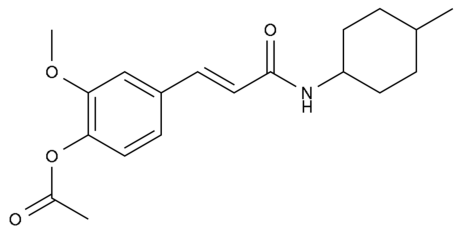

COc1cc(C=CC(=O)NC2CCC(C)CC2)ccc1OC(C)=O
COc1cc(C=CC(=O)NC2CCC(C)CC2)ccc1OC(C)=O


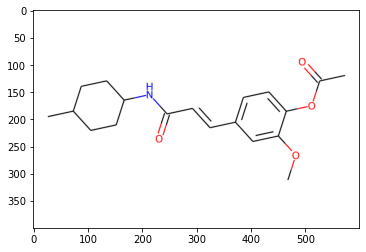

230
InChI=1S/C16H12N2O6/c19-17(20)9-1-3-11-12-4-2-10(18(21)22)8-14(12)15(13(11)7-9)16-23-5-6-24-16/h1-4,7-8,15-16H,5-6H2
InChI=1S/C16H12N2O6/c19-17(20)9-2-4-12-13(7-9)11-3-1-10(18(21)22)8-14(11)15(12)16-23-5-6-24-16/h1-4,7-8,15-16H,5-6H2


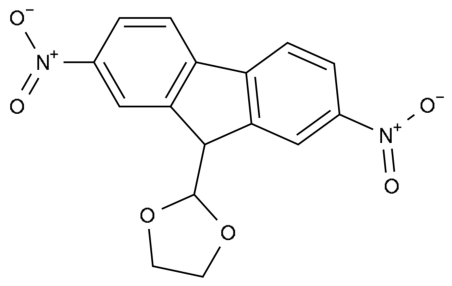

O=[N+]([O-])c1ccc2c(c1)C(C1OCCO1)c1cc([N+](=O)[O-])ccc1-2
O=[N+]([O-])c1ccc2c(c1)-c1ccc([N+](=O)[O-])cc1C2C1OCCO1


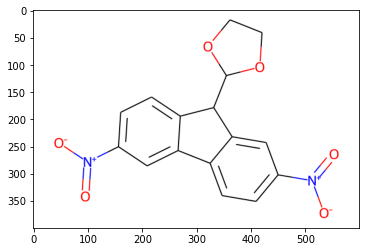

253
InChI=1S/C21H29N3O9/c1-4-31-15(26)8-14(20(29)32-5-2)24-9-12(11-25)7-13(10-24)18-22-16(21(30)33-6-3)17(27)19(28)23-18/h8,12-13,25,27H,4-7,9-11H2,1-3H3,(H,22,23,28)
InChI=1S/C21H29N3O9/c1-4-31-15(26)8-14(19(29)32-5-2)13-7-12(11-25)9-24(10-13)21-22-16(20(30)33-6-3)17(27)18(28)23-21/h8,12-13,25,27H,4-7,9-11H2,1-3H3,(H,22,23,28)


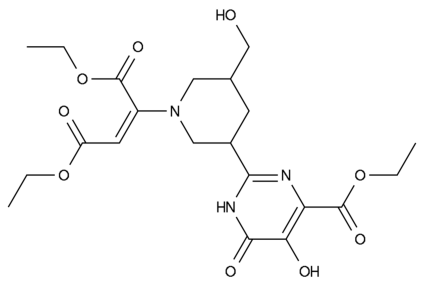

CCOC(=O)C=C(C(=O)OCC)N1CC(CO)CC(c2nc(C(=O)OCC)c(O)c(=O)[nH]2)C1
CCOC(=O)C=C(C(=O)OCC)C1CC(CO)CN(c2nc(C(=O)OCC)c(O)c(=O)[nH]2)C1


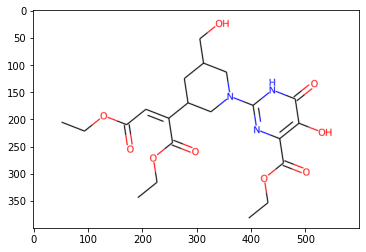

256
InChI=1S/C16H18N3S/c1-18(2)11-5-7-13-15(9-11)20-16-10-12(19(3)4)6-8-14(16)17-13/h5-10H,1-4H3/q+1
InChI=1S/C15H17N3S/c1-17(2)10-5-6-12-14(8-10)19-15-9-11(18(3)4)7-13(15)16-12/h5-9H,1-4H3/p+1


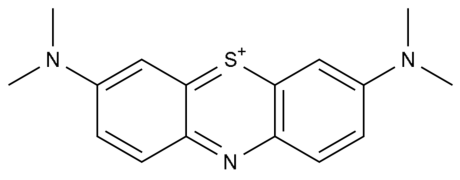

CN(C)c1ccc2nc3ccc(N(C)C)cc3[s+]c2c1
CN(C)c1cc2[nH+]c3ccc(N(C)C)cc3sc-2c1


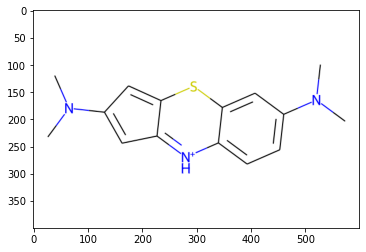

368
InChI=1S/C28H42N2O2/c1-2-3-4-5-6-7-8-9-10-11-12-15-22-32-27-19-17-25(18-20-27)23-28(31)30-24-26-16-13-14-21-29-26/h13-14,16-21H,2-12,15,22-24H2,1H3,(H,30,31)
InChI=1S/C28H44N2O2/c1-2-3-4-5-6-7-8-9-10-11-12-15-22-32-27-19-17-25(18-20-27)23-28(31)30-24-26-16-13-14-21-29-26/h13-14,16-21,28,30-31H,2-12,15,22-24H2,1H3


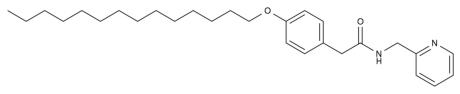

CCCCCCCCCCCCCCOc1ccc(CC(=O)NCc2ccccn2)cc1
CCCCCCCCCCCCCCOc1ccc(CC(O)NCc2ccccn2)cc1


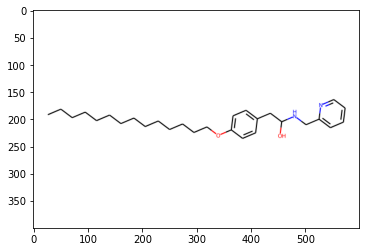

399
InChI=1S/C15H20O6/c1-5-6-7-8-15(11(2)17,14(19)21-4)12(10-16)9-13(18)20-3/h10,12H,5,8-9H2,1-4H3
InChI=1S/C15H20O5/c1-5-6-7-8-15(11(2)17,12(3)18)13(10-16)9-14(19)20-4/h10,13H,5,8-9H2,1-4H3


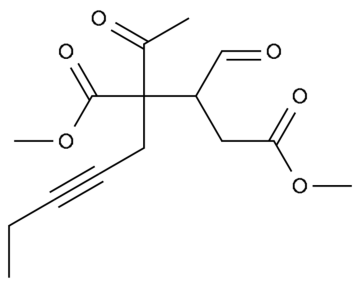

CCC#CCC(C(C)=O)(C(=O)OC)C(C=O)CC(=O)OC
CCC#CCC(C(C)=O)(C(C)=O)C(C=O)CC(=O)OC


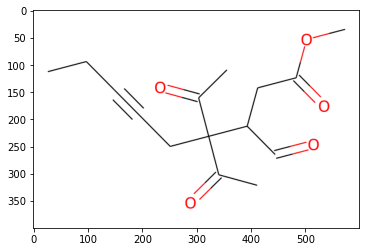

408
InChI=1S/C17H27N3O2/c1-2-5-17(22-15-12-19-10-13-21-14-11-19)16(4-1)20-8-3-6-18-7-9-20/h1-2,4-5,18H,3,6-15H2
InChI=1S/C16H25N3O2/c1-2-4-16(15(3-1)19-7-5-17-6-8-19)21-14-11-18-9-12-20-13-10-18/h1-4,17H,5-14H2


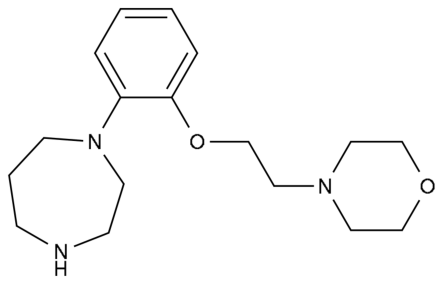

c1ccc(N2CCCNCC2)c(OCCN2CCOCC2)c1
c1ccc(N2CCNCC2)c(OCCN2CCOCC2)c1


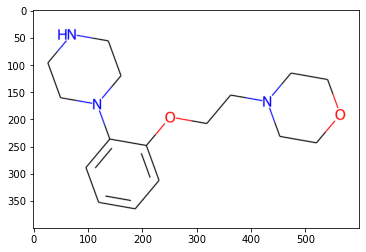

410
InChI=1S/C18H25N5O3/c24-23-7-5-13(6-8-23)18(11-23)10-19-17(26-18)22-15-9-16(21-12-20-15)25-14-3-1-2-4-14/h9,12-14H,1-8,10-11H2,(H,19,20,21,22)
InChI=1S/C17H23N5O3/c23-22-6-5-12(22)8-17(10-22)9-18-16(25-17)21-14-7-15(20-11-19-14)24-13-3-1-2-4-13/h7,11-13H,1-6,8-10H2,(H,18,19,20,21)


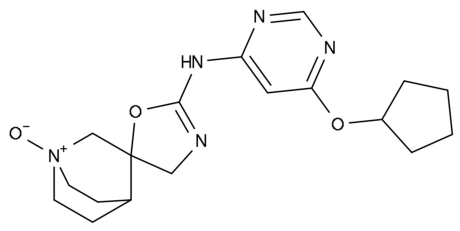

[O-][N+]12CCC(CC1)C1(CN=C(Nc3cc(OC4CCCC4)ncn3)O1)C2
[O-][N+]12CCC1CC1(CN=C(Nc3cc(OC4CCCC4)ncn3)O1)C2


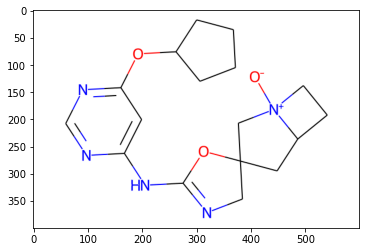

460
InChI=1S/CH2O/c1-2/h1H2
InChI=1S/CHNO/c2-1-3/h3H


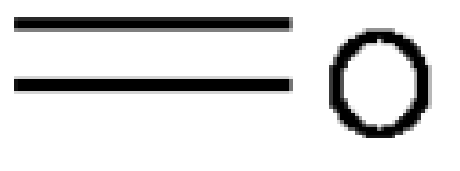

C=O
N#CO


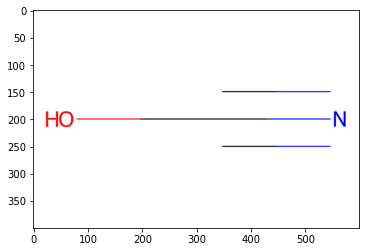

473
InChI=1S/C23H27N5O3S3/c1-26(2)22(29)28-11-9-23(10-12-28)15-24-21(33-23)17-14-16-6-4-7-18(20(16)25-17)27(3)34(30,31)19-8-5-13-32-19/h4-8,13-14,25H,9-12,15H2,1-3H3
InChI=1S/C23H28N6O3S2/c1-27(2)22(30)29-11-9-23(10-12-29)15-24-21(26-23)17-14-16-6-4-7-18(20(16)25-17)28(3)34(31,32)19-8-5-13-33-19/h4-8,13-14,25H,9-12,15H2,1-3H3,(H,24,26)


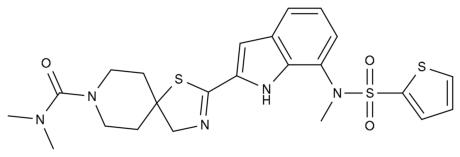

CN(C)C(=O)N1CCC2(CC1)CN=C(c1cc3cccc(N(C)S(=O)(=O)c4cccs4)c3[nH]1)S2
CN(C)C(=O)N1CCC2(CC1)CN=C(c1cc3cccc(N(C)S(=O)(=O)c4cccs4)c3[nH]1)N2


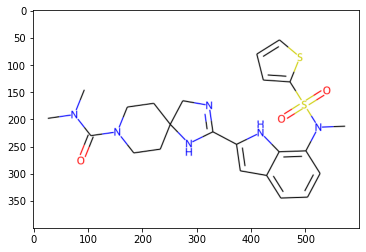

625
InChI=1S/CH3.3O.Re/h1H3;;;;
InChI=1S/C2H6O2P/c1-5(2,3)4/h1-2H3


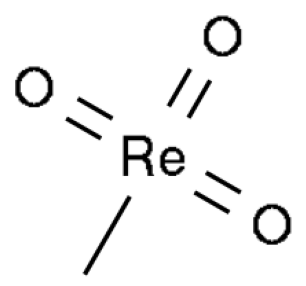

C[Re](=O)(=O)=O
C[PH](C)(=O)=O


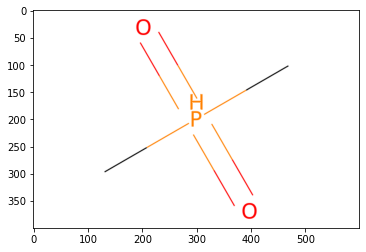

637
InChI=1S/C28H39NO4Si/c1-8-20-19-23(29(24(20)30)25(31)32-26(2,3)4)28(33-34-27(5,6)7,21-15-11-9-12-16-21)22-17-13-10-14-18-22/h9-18,20,23H,8,19,34H2,1-7H3
InChI=1S/C26H35NO4Si/c1-7-19-18-22(27(23(19)28)24(29)30-25(2,3)4)26(31-32(5)6,20-14-10-8-11-15-20)21-16-12-9-13-17-21/h8-17,19,22,32H,7,18H2,1-6H3


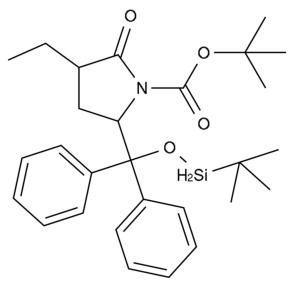

CCC1CC(C(O[SiH2]C(C)(C)C)(c2ccccc2)c2ccccc2)N(C(=O)OC(C)(C)C)C1=O
CCC1CC(C(O[SiH](C)C)(c2ccccc2)c2ccccc2)N(C(=O)OC(C)(C)C)C1=O


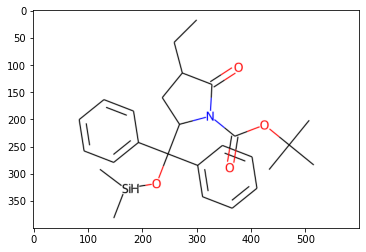

685
InChI=1S/C14H16FNO/c1-16-5-4-9-6-14(17)12-7-10(15)2-3-11(12)13(9)8-16/h2-3,7,9,13H,4-6,8H2,1H3
InChI=1S/C14H14FNO2/c1-16-7-12-8(5-14(16)18)4-13(17)11-6-9(15)2-3-10(11)12/h2-3,6,8,12H,4-5,7H2,1H3


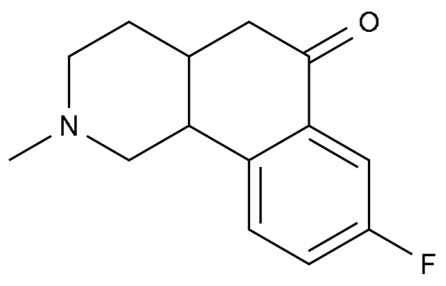

CN1CCC2CC(=O)c3cc(F)ccc3C2C1
CN1CC2c3ccc(F)cc3C(=O)CC2CC1=O


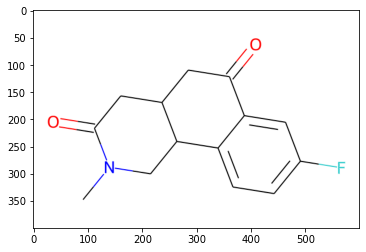

708
InChI=1S/C15H16N2S/c1-2-5-11-10(4-1)15-14-12(17-11)6-3-7-13(14)18-9-8-16-15/h1-2,4-5,13,16H,3,6-9H2
InChI=1S/C16H20N2S/c1-2-6-14-12(5-1)16-13-10-11(18-14)4-3-7-15(13)19-9-8-17-16/h1-2,5-6,13,15-17H,3-4,7-10H2


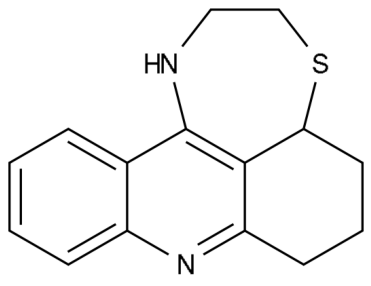

c1ccc2c3c4c(nc2c1)CCCC4SCCN3
c1ccc2c(c1)N=C1CCCC3SCCNC2C3C1


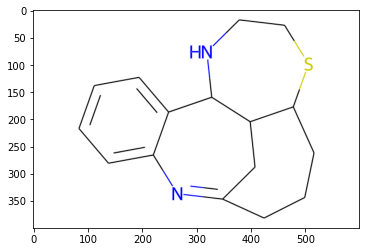

811
InChI=1S/C33H41N5O5S3/c1-33(24-38-13-17-44-18-14-38,45-22-25-9-5-4-6-10-25)23-35-32(39)28-20-26-19-27(43-16-15-42-3)21-29(31(26)36-28)37(2)46(40,41)30-11-7-8-12-34-30/h4-12,19-21,36H,13-18,22-24H2,1-3H3,(H,35,39)
InChI=1S/C34H44N6O5S3/c1-34(25-40-14-18-46-19-15-40,47-23-26-10-6-5-7-11-26)24-36-33(41)29-21-27-20-28(39(3)48(42,43)31-12-8-9-13-35-31)22-30(32(27)37-29)38(2)45-17-16-44-4/h5-13,20-22,37H,14-19,23-25H2,1-4H3,(H,36,41)


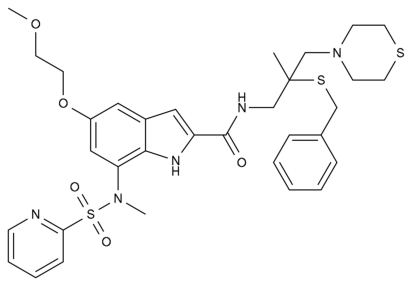

COCCOc1cc(N(C)S(=O)(=O)c2ccccn2)c2[nH]c(C(=O)NCC(C)(CN3CCSCC3)SCc3ccccc3)cc2c1
COCCON(C)c1cc(N(C)S(=O)(=O)c2ccccn2)cc2cc(C(=O)NCC(C)(CN3CCSCC3)SCc3ccccc3)[nH]c12


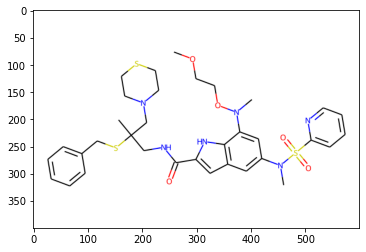

In [25]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw
import numpy as np
from bms.utils import canonicalize_smiles

BASE = '../'

pred = pd.read_csv('../output/indigo/swin_base_50_lstm/prediction_valid.csv')
print(np.mean(data['InChI'].values == pred['SMILES_InChI'].values))

gold_smiles_list = [canonicalize_smiles(row['SMILES'], True) for i,row in data.iterrows() if row['num_atom']>50]
pred_smiles_list = [canonicalize_smiles(row['SMILES'], True) for i,row in pred.iterrows() if data.loc[i,'num_atom']>50]
print((np.array(gold_smiles_list) == np.array(pred_smiles_list)).mean())

count = 0

for i, row in data.iterrows():
    if row['InChI'] == pred.loc[i, 'SMILES_InChI']:
        continue
    print(i)
    print(row['InChI'])
    print(pred.loc[i, 'SMILES_InChI'])
    image = cv2.imread(BASE + row['file_path'])
    plt.figure(figsize=(8,5))
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    gold_smiles = canonicalize_smiles(data.loc[i, 'SMILES'], True)
    pred_smiles = canonicalize_smiles(pred.loc[i, 'SMILES'], True)
    print(gold_smiles)
    print(pred_smiles)
    try:
        mol = Chem.MolFromSmiles(pred_smiles)
#         display(mol)
        img = Draw.MolToImage(mol, size=(600,400))
        plt.imshow(img)
        plt.show()
    except:
        pass
    count += 1
    if count > 20:
        break